In [1]:
import numpy as np
import pandas as pd
import pylab as plt

In [2]:
from PyEMD import EMD

## Data loading

#### Treated TMP data of Membrane D from 2013 to 2018

In [3]:
df_x = pd.read_excel('Treated_TMP_data_MemD.xlsx', header=None)

In [4]:
df_x.shape

(1196, 1)

In [5]:
array_x = df_x.to_numpy()

In [6]:
array_x.shape, type(array_x)

((1196, 1), numpy.ndarray)

In [7]:
new_array_x = array_x.flatten()
new_array_x.shape

(1196,)

In [8]:
t = np.arange(1, 1197, 1)
t.shape

(1196,)

# EMD (Empirical mode decomposition)

In [9]:
emd = EMD()
IMFs_TMP = emd.emd(new_array_x, t)

In [10]:
IMFs_TMP.shape

(8, 1196)

In [11]:
N = IMFs_TMP.shape[0]
N

8

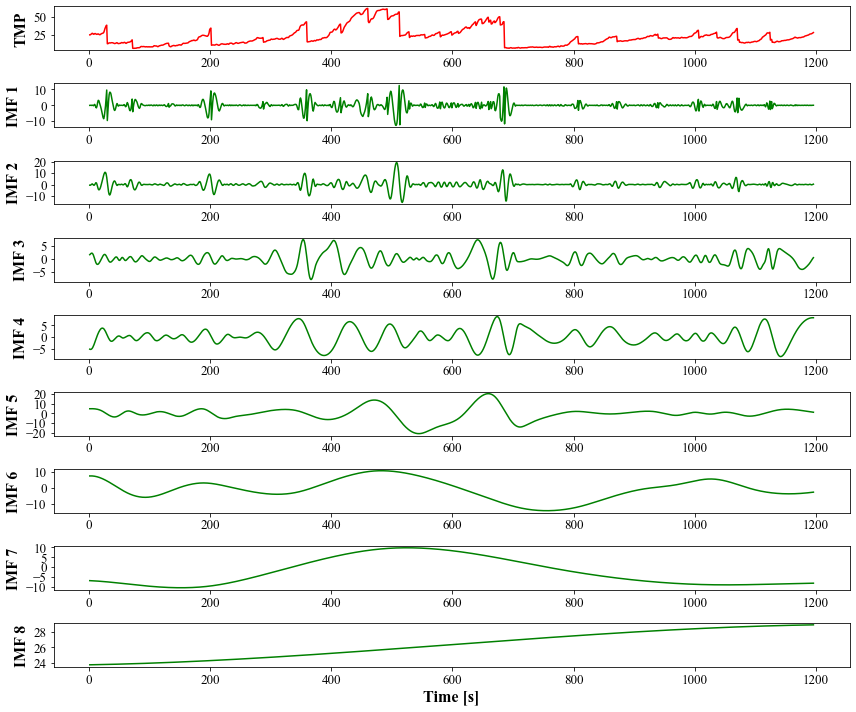

In [12]:
# Plot results
plt.figure(figsize=(12,10))
plt.subplot(N+1, 1, 1)
plt.plot(t, new_array_x, 'r')
plt.ylabel("TMP", fontsize=16, weight = 'bold', fontname = 'Times new roman')
plt.yticks(fontsize=13, fontname = 'Times new roman')
plt.xticks(fontsize=13, fontname = 'Times new roman')
    
for n in range(N):
    plt.subplot(N+1, 1, n+2)
    plt.plot(t, IMFs_TMP[n], 'g')
    plt.ylabel("IMF %i" %(n+1), fontsize=16, weight = 'bold', fontname = 'Times new roman')
    plt.yticks(fontsize=13, fontname = 'Times new roman')
    plt.xticks(fontsize=13, fontname = 'Times new roman')
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]", fontsize=16, weight = 'bold', fontname = 'Times new roman')
plt.tight_layout()
# plt.savefig('EMD TMP MemD', dpi=120)
plt.show()

# Ensemble EMD

In [13]:
from PyEMD import EEMD

# Assign EEMD to `eemd` variable
eemd = EEMD()

# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection="parabol"

# Execute EEMD on S
eIMFs = eemd.eemd(new_array_x, t)
nIMFs = eIMFs.shape[0]

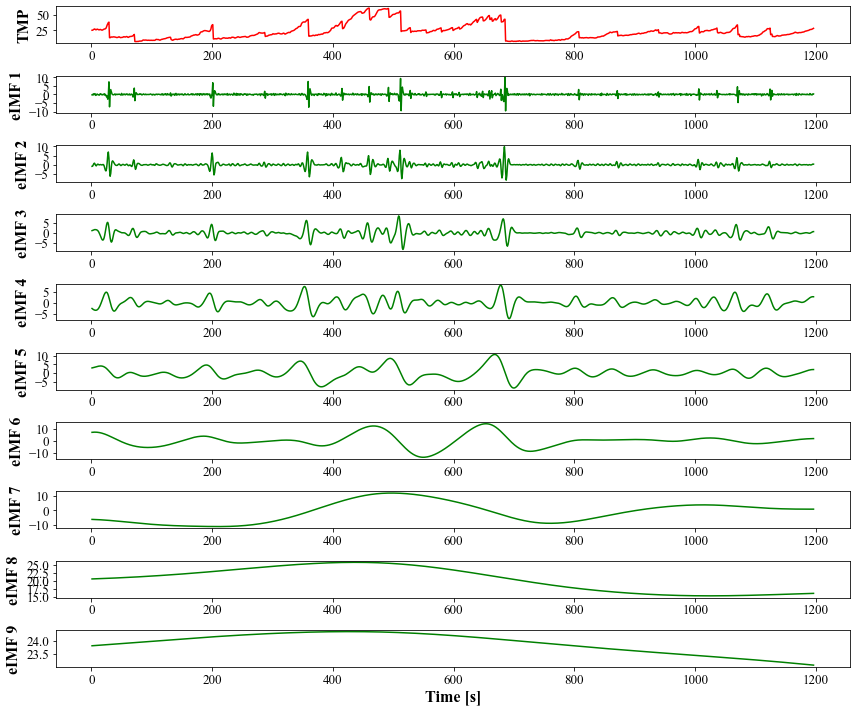

In [14]:
# Plot results
plt.figure(figsize=(12,10))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, new_array_x, 'r')
plt.ylabel("TMP", fontsize=16, weight = 'bold', fontname = 'Times new roman')
plt.yticks(fontsize=13, fontname = 'Times new roman')
plt.xticks(fontsize=13, fontname = 'Times new roman')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.yticks(fontsize=13, fontname = 'Times new roman')
    plt.xticks(fontsize=13, fontname = 'Times new roman')
    plt.ylabel("eIMF %i" %(n+1), fontsize=16, weight = 'bold', fontname = 'Times new roman')
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]", fontsize=16, weight = 'bold', fontname = 'Times new roman')
plt.tight_layout()
# plt.savefig('EEMD TMP MemD', dpi=120)
plt.show()

# Lasso

In [15]:
type(IMFs_TMP)

numpy.ndarray

In [16]:
column_names = ["IMF 1", "IMF 2", "IMF 3", "IMF 4", "IMF 5", "IMF 6", "IMF 7", "IMF 8"]
df_IMFs_TMP = pd.DataFrame(IMFs_TMP.transpose(), columns=column_names)
df_IMFs_TMP

,IMF 1,IMF 2,IMF 3,IMF 4,IMF 5,IMF 6,IMF 7,IMF 8
0,-0.022511,-0.572111,1.615696,-5.061210,4.735102,7.632781,-6.778162,23.794227
1,-0.013600,-0.626481,1.846320,-5.163829,4.755795,7.650180,-6.792175,23.795617
2,0.058395,-0.204148,2.065666,-5.145886,4.769021,7.656299,-6.806811,23.797022
3,-0.066727,0.337089,2.204227,-5.000937,4.774162,7.650969,-6.822066,23.798442
4,0.093903,0.555667,2.179092,-4.722690,4.770189,7.634343,-6.837931,23.799876
...,...,...,...,...,...,...,...,...
1191,0.062751,-0.139457,-0.893053,8.184534,1.497564,-2.751227,-8.087229,28.866015
1192,-0.060512,-0.264901,-0.519459,8.220115,1.409358,-2.705893,-8.080862,28.867296
1193,0.024020,-0.115679,-0.154526,8.240992,1.322867,-2.659529,-8.074515,28.868562
1194,0.058060,0.136535,0.182905,8.247346,1.238217,-2.612145,-8.068189,28.869814


In [17]:
df_x.rename(columns={0:"TMP"})

,TMP
0,25.343812
1,25.451826
2,26.189558
3,26.875160
4,27.472448
...,...
1191,26.739897
1192,26.865142
1193,27.452191
1194,28.052543


## Lasso

C:\Users\Taeyong\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


IMF1 feature importance score: 0.97806
IMF2 feature importance score: 0.98625
IMF3 feature importance score: 0.98809
IMF4 feature importance score: 0.99327
IMF5 feature importance score: 0.99886
IMF6 feature importance score: 0.99777
IMF7 feature importance score: 0.99876
IMF8 feature importance score: 0.98065


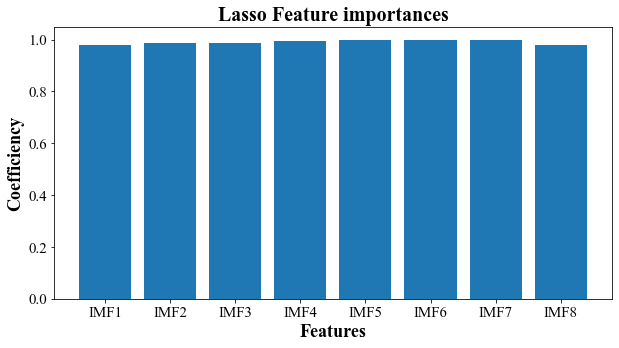

In [18]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV

Importance = pd.DataFrame()
Lasso=[]
df=pd.DataFrame()

Total = pd.DataFrame(columns=['Lasso'])

X = df_IMFs_TMP
y = df_x

lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)

# summarize feature importance
labels = ['IMF1', 'IMF2', 'IMF3', 'IMF4', 'IMF5', 'IMF6', 'IMF7', 'IMF8']
index = np.arange(len(labels))

for i,v in enumerate(importance):
    Lasso.append(v)
    print('%s feature importance score: %.5f' % (labels[i],v))

# plot feature importance
plt.figure(figsize=(10,5))
plt.bar([x for x in range(len(importance))], importance)
plt.title("Lasso Feature importances", fontsize = 20, weight = 'bold', fontname = 'Times new roman')
plt.yticks(fontsize=15, fontname = 'Times new roman')
plt.xticks(index, labels, fontsize=15, fontname = 'Times new roman')
plt.xlabel('Features', fontsize=18, weight = 'bold', fontname = 'Times new roman')
plt.ylabel('Coefficiency', fontsize=18, weight = 'bold', fontname = 'Times new roman')
plt.savefig('Lasso_EMD.png', dpi=1000)
plt.show()



# Logistic Regression Feature Importance

## EMD

In [19]:
X = df_IMFs_TMP
y = df_x

X2 = X*100
y2 = y*100

X2 = X2.astype('int')
y2 = y2.astype('int')

## Logistic regression

Feature: 0, Score: -0.00996
Feature: 1, Score: -0.06510
Feature: 2, Score: -0.00537
Feature: 3, Score: -0.01205
Feature: 4, Score: 0.01171
Feature: 5, Score: -0.04317
Feature: 6, Score: -0.05411
Feature: 7, Score: 0.00092


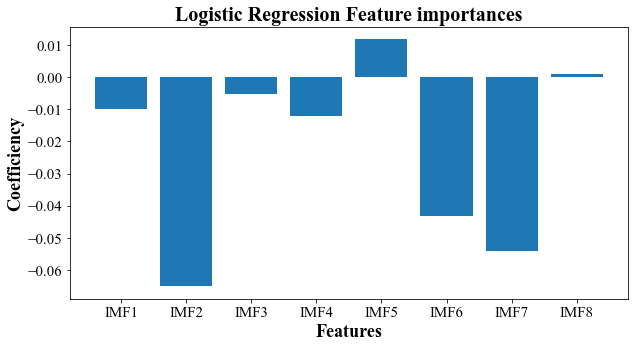

In [20]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import os, sys, warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses

Log_Reg=[]

# define the model
model = LogisticRegression()

# fit the model
model.fit(X2, y2)

# get importance
importance = model.coef_[0]

# summarize feature importance

for i,v in enumerate(importance):
    Log_Reg.append(v)
    print('Feature: %0d, Score: %.5f' % (i,v))

labels = ['IMF1', 'IMF2', 'IMF3', 'IMF4', 'IMF5', 'IMF6', 'IMF7', 'IMF8']
index = np.arange(len(labels))

# plot feature importance
plt.figure(figsize=(10,5))
plt.bar([x for x in range(len(importance))], importance)
plt.title("Logistic Regression Feature importances", fontsize = 20, weight = 'bold', fontname = 'Times new roman')
plt.yticks(fontsize=15, fontname = 'Times new roman')
plt.xticks(index, labels, fontsize=15, fontname = 'Times new roman')
plt.xlabel('Features', fontsize=18, weight = 'bold', fontname = 'Times new roman')
plt.ylabel('Coefficiency', fontsize=18, weight = 'bold', fontname = 'Times new roman')
plt.savefig('Logistic Regression_EMD.png', dpi=1000)
plt.show()

# Decision Tree Regressor Feature Importance

IMF1 feature importance score: 0.00235
IMF2 feature importance score: 0.00739
IMF3 feature importance score: 0.02152
IMF4 feature importance score: 0.05351
IMF5 feature importance score: 0.18109
IMF6 feature importance score: 0.15380
IMF7 feature importance score: 0.54160
IMF8 feature importance score: 0.03875


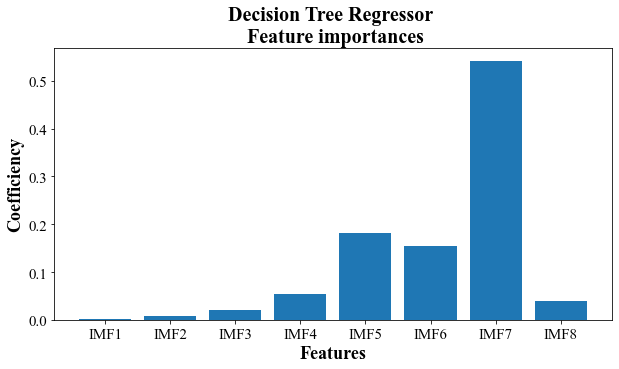

In [21]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

DT_Reg = []

# define the model
model = DecisionTreeRegressor()

X = df_IMFs_TMP
y = df_x

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

labels = ['IMF1', 'IMF2', 'IMF3', 'IMF4', 'IMF5', 'IMF6', 'IMF7', 'IMF8']
index = np.arange(len(labels))

# summarize feature importance
for i,v in enumerate(importance):
    DT_Reg.append(v)
    print('%s feature importance score: %.5f' % (labels[i],v))

# plot feature importance
plt.figure(figsize=(10,5))
plt.bar([x for x in range(len(importance))], importance)
plt.title("Decision Tree Regressor \n Feature importances", fontsize = 20, weight = 'bold', fontname = 'Times new roman')
plt.yticks(fontsize=15, fontname = 'Times new roman')
plt.xticks(index, labels, fontsize=15, fontname = 'Times new roman')
plt.xlabel('Features', fontsize=18, weight = 'bold', fontname = 'Times new roman')
plt.ylabel('Coefficiency', fontsize=18, weight = 'bold', fontname = 'Times new roman')
plt.savefig('DecisionTreeRegressor_EMD.png', dpi=1000)
plt.show()

# Random Forest Feature Importance

IMF1 feature importance score: 0.00479
IMF2 feature importance score: 0.01140
IMF3 feature importance score: 0.01699
IMF4 feature importance score: 0.05425
IMF5 feature importance score: 0.22538
IMF6 feature importance score: 0.14764
IMF7 feature importance score: 0.50129
IMF8 feature importance score: 0.03826


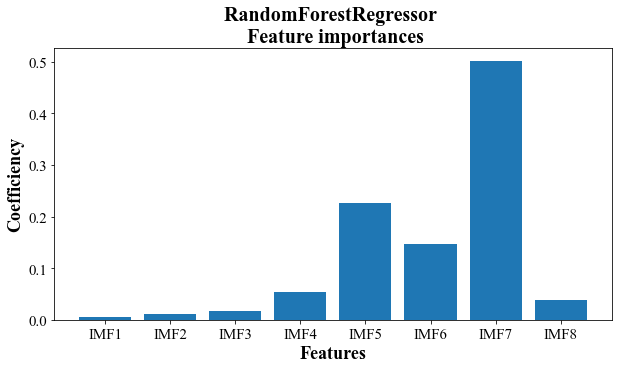

In [22]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

RF_Reg=[]

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    RF_Reg.append(v)
    print('%s feature importance score: %.5f' % (labels[i],v))
    
# plot feature importance
plt.figure(figsize=(10,5))
pyplot.bar([x for x in range(len(importance))], importance)
plt.title("RandomForestRegressor \n Feature importances", fontsize = 20, weight = 'bold', fontname = 'Times new roman')
plt.yticks(fontsize=15, fontname = 'Times new roman')
plt.xticks(index, labels, fontsize=15, fontname = 'Times new roman')
plt.xlabel('Features', fontsize=18, weight = 'bold', fontname = 'Times new roman')
plt.ylabel('Coefficiency', fontsize=18, weight = 'bold', fontname = 'Times new roman')
plt.savefig('RandomForestRegressor_EMD.png', dpi=1000)

pyplot.show()

# XG Boost Regressor Feature Importance

In [23]:
# ! pip install xgboost

IMF1 feature importance score: 0.00177
IMF2 feature importance score: 0.00549
IMF3 feature importance score: 0.00596
IMF4 feature importance score: 0.03929
IMF5 feature importance score: 0.16298
IMF6 feature importance score: 0.11343
IMF7 feature importance score: 0.62770
IMF8 feature importance score: 0.04337


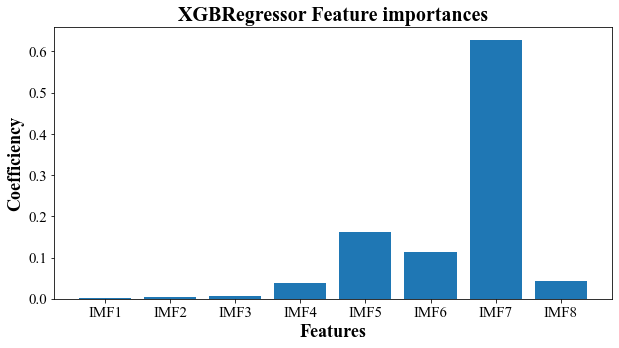

In [24]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# define the model

XGB_Reg=[]

model = XGBRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    XGB_Reg.append(v)
    print('%s feature importance score: %.5f' % (labels[i],v))

# plot feature importance
plt.figure(figsize=(10,5))
pyplot.bar([x for x in range(len(importance))], importance)
plt.title("XGBRegressor Feature importances", fontsize = 20, weight = 'bold', fontname = 'Times new roman')
plt.yticks(fontsize=15, fontname = 'Times new roman')
plt.xticks(index, labels, fontsize=15, fontname = 'Times new roman')
plt.xlabel('Features', fontsize=18, weight = 'bold', fontname = 'Times new roman')
plt.ylabel('Coefficiency', fontsize=18, weight = 'bold', fontname = 'Times new roman')
plt.savefig('XGBRegressor_EMD.png', dpi=1000)
pyplot.show()

# Permutation Feature Importance for Regression

IMF1 feature importance score: 1.54058
IMF2 feature importance score: 9.82188
IMF3 feature importance score: 4.11431
IMF4 feature importance score: 12.01492
IMF5 feature importance score: 71.99881
IMF6 feature importance score: 61.19840
IMF7 feature importance score: 105.78360
IMF8 feature importance score: 4.05304


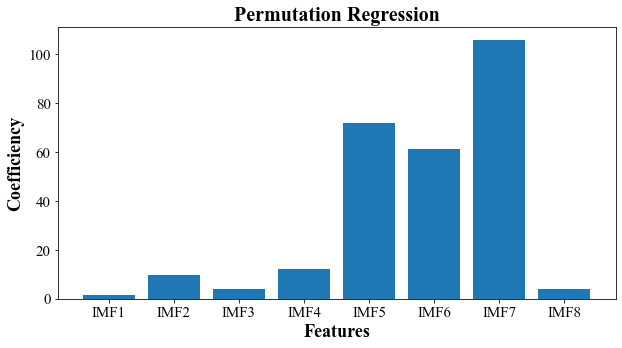

In [25]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

Premutation_Reg_KN=[]

# define the model
model = KNeighborsRegressor()

# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    Premutation_Reg_KN.append(v)
    print('%s feature importance score: %.5f' % (labels[i],v))

# plot feature importance
plt.figure(figsize=(10,5))
pyplot.bar([x for x in range(len(importance))], importance)
plt.title("Permutation Regression", fontsize = 20, weight = 'bold', fontname = 'Times new roman')
plt.yticks(fontsize=15, fontname = 'Times new roman')
plt.xticks(index, labels, fontsize=15, fontname = 'Times new roman')
plt.xlabel('Features', fontsize=18, weight = 'bold', fontname = 'Times new roman')
plt.ylabel('Coefficiency', fontsize=18, weight = 'bold', fontname = 'Times new roman')
plt.savefig('Permutation Regression_EMD.png', dpi=1000)
pyplot.show()